# The FordGo bike sharing service
## The influence of spatial and temporal coordinates on traffic

### Saverio Tufano, Bedford UK, Feb-22

## Investigation Overview

In this investigation, we wanted find geografical and temporal patterns in the usage of the bike sharing service FordGo in the San Francisco Bay.
This popular services counts more than 300 stations and several thousands of users.

## Key findings

### Temporal Patterns
- There is a clear dependence on working patters. On a working day, the number of rides is about double respect to a weekend day.
- The working days traffic peaks are more pronounced, with peaktime rides traffic being fourfold the midday one.
- the traffic on the weekends is more evenly spread during the day with a peak around 14.00.

### Spatial Patterns
- there are large differences depending on the starting (and ending) station of the ride. The main stations can have thousands of ride per month whilst those with least traffic can have less than 10 starting rides.

## Dataset Overview

The dataset consists in 16 attributes of more than 180k bike rides taken during the month of Feb-2019.

The attributes include:
- duration of the ride
- start and end time of the ride
- start in and ending station (with their own latitude and longitude)
- bike ID
- whether the ride was done by a member or by a subscriber
- date of birth of the rider
- bike share for all trip

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [22]:
# load the dataset
df = pd.read_csv('FordGo_clean.csv')

### Domain understanding
It is important to give a bit of context before diving into the data. 

<br>
[...] Customers can go to a dock (bike station), take the bike after having unlocked it through the App, and then they can leave the bicycle in one of the stations that are based around the city. This service was launched in August 2013 with the name “Bay Area Bike Share” and in June 2017 it became Ford GoBike because of the partnership with Ford Motor Company. It currently has around 2500 bikes and 290 stations across San Francisco, San Jose and Bay’s East Coast
<br>
The system is operated by Motivate, a New York-based company that provides the bike-share system and operates in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. <br>
Expectations are that the entire system will reach 7000 bikes and 540 stations in the Bay Area.

Source: https://federicoraimondi.github.io/myProjects/Bike_Sharing_Analysis/

In [23]:
# set a single color for the plotting, the avion blue
base_color = sb.color_palette()[0] 

In [24]:
# define function for common chart settings
def chart(xlabel = "default label", ylabel = "default label", title = "title", xticks_rotation = 0):
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.title(title,  weight = "bold", fontsize = 20)
    plt.xticks(rotation=xticks_rotation);

### Temporal patterns 
In this section, we will find what patterns does the rides traffic follow depending on the day of the week and the time of the day.

### Temporal patterns 
#### Day of the week
The analysis shows there is a clear dependence on working patters. On a working day, the number of rides is about double respect to a weekend day.

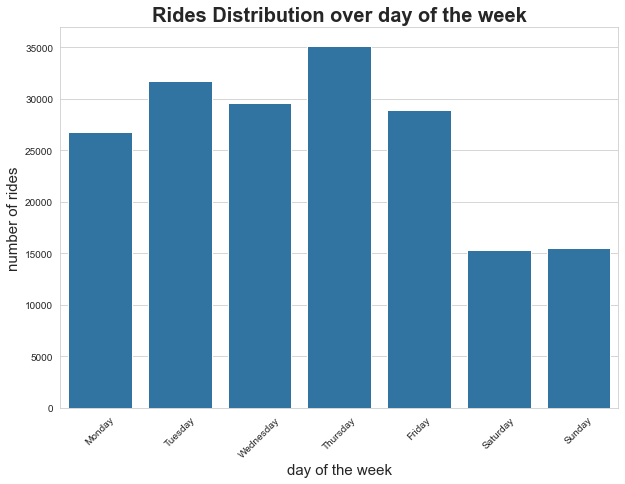

In [25]:
# convert start and end time from string to datetime
plt.figure(figsize=[10, 7])
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = sb.countplot(data=df, x=df['start_time'].dt.day_name(),color=base_color, order = day_order);
chart("day of the week", "number of rides", "Rides Distribution over day of the week", 45)


### Temporal patterns 
#### Time of the day
How does the traffic vary depending on the time of the day (month Feb 19)? <br>
The pattern has two peaks corresponding to the standard traffic peak hours: 8.00 and 17.00.
When splitting the plot between working and no-working days, we get more insight:
- the working days traffic peaks are more pronounced, with peaktime rides traffic being fourfold the midday one.
- the traffic on the weekends is more evenly spread during the day with a peak around 14.00.

These findings are suggesting the service is used by commuters.

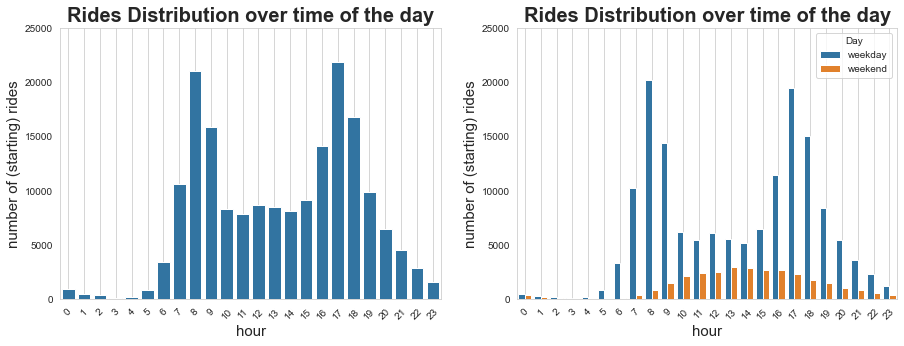

In [26]:
# use seaborn countplot and "datetime" library
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
g = sb.countplot(data=df, x=df['start_time'].dt.hour,color=base_color);
chart("hour", "number of (starting) rides", "Rides Distribution over time of the day", 45)
g.set_ylim([0, 25000])
plt.grid()

plt.subplot(1,2,2)
g = sb.countplot(data=df, x=df['start_time'].dt.hour, hue = 'Weekday');
chart("hour", "number of (starting) rides", "Rides Distribution over time of the day", 45)
g.set_ylim([0, 25000])
plt.grid()
g.set_ylim([0, 25000])
plt.legend(title="Day");

### Spatial Patterns
In this final section, we will find how is the traffic distributed in the S.F. area.

### Traffic by station
The question we want to answer is whether the rides evenly distributed across the 329 stations providing the service.

As shown in the plot below, there are large differences depending on the starting (and ending) station of the ride. The main stations can have thousands of ride per month whilst those with least traffic can have less than 10 starting rides.

Market St at 10th St and S.F. Caltrain Station 2 are the stations scoring the highest traffic.


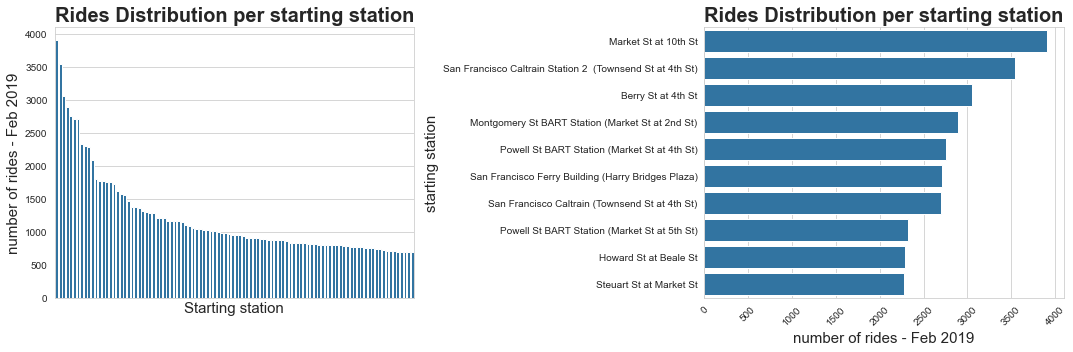

In [27]:

# create a frequency variable that will later allow to order the stations
#in decreasing order of number of rides
freq = df['start_station_name'].value_counts()
# Get the indexes of the Series
start_station_id = freq.index
# set figure dimension
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
# Plot the bar chart in the decreasing order of the frequency of the `start_station_name`
g = sb.countplot(data=df, x='start_station_name', color=base_color, order=start_station_id[:100]);
chart("Starting station", "number of rides - Feb 2019", "Rides Distribution per starting station", None)
# to avoid overplotting, remove x-axis ticks and labels
g.set(xticks=[]); 
g.set(xticklabels=[]);

# Same plot but limited to 20 entries and oriented in y-direction
# this will allow reading the most common stations
plt.subplot(1,2,2)
g = sb.countplot(data=df, y='start_station_name', color=base_color, order=start_station_id[0:10]);
chart("number of rides - Feb 2019", "Starting station", "Rides Distribution per starting station", 45)

g.set_xlabel("number of rides - Feb 2019", fontsize = 15)
g.set_ylabel("starting station", fontsize = 15)# to avoid overplotting, remove x-axis ticks and labels

plt.tight_layout()

### Traffic by geographical location
- The traffic is concentrated in three main areas, the most popular being that of latitude 37.8 deg and longitude -122.4 deg, which corresponds to the S.F. Embarcadero area.
- The spatial patterns are similar between working days and weekends. Only changing point is the volume of traffic.

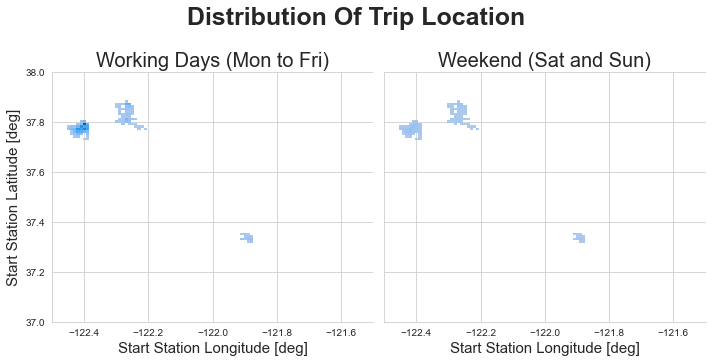

In [28]:
sb.set_style("whitegrid")
g = sb.displot(df, x = 'start_station_longitude', y = 'start_station_latitude',col = 'Weekday', binwidth=(.01, .01));

#g.set_xlabel("Starting Station Longitude [deg]", fontsize = 15)
#g.set_ylabel("Starting Station Latitude [deg]", fontsize = 15)
g.set(ylim=(37, 38))
g.set(xlim=(-122.5, -121.5));
g.axes[0,0].set_xlabel('Start Station Longitude [deg]', fontsize = 15);
g.axes[0,1].set_xlabel('Start Station Longitude [deg]', fontsize = 15);

g.axes[0,0].set_ylabel('Start Station Latitude [deg]', fontsize = 15);
g.axes[0,1].set_ylabel('Start Station Latitude [deg]', fontsize = 15);

g.axes[0,0].set_title('Working Days (Mon to Fri)', fontsize = 20);
g.axes[0,1].set_title('Weekend (Sat and Sun)', fontsize = 20);

# If a visualisation has subplots, add a MAIN title
plt.suptitle("Distribution of trip location".title(), y = 1,
            fontsize = 25, weight = "bold")

#Optimize distance between subplots
plt.tight_layout()

In [30]:
!jupyter nbconvert Part_2.ipynb --to html --post serve --no-input --no-prompt;

[NbConvertApp] Converting notebook Part_2.ipynb to html
[NbConvertApp] Writing 712097 bytes to Part_2.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_2.html
Use Control-C to stop this server
